In [ ]:
import plotly.express as px
import pandas as pd

##data also available here--> https://shorturl.at/pGUVu 
data = {
    "Sustainable Development Goals": [
        "01 No Poverty",
        "02 Zero Hunger",
        "03 Good Health And Well Being",
        "04 Quality Education",
        "05 Gender Equality",
        "06 Clean Water And Sanitation",
        "07 Affordable And Clean Energy",
        "08 Decent Work And Economic Growth",
        "09 Industry Innovation And Infrastructure",
        "10 Reduced Inequality",
        "11 Sustainable Cities And Communities",
        "12 Responsible Consumption And Production",
        "13 Climate Action",
        "14 Life Below Water",
        "15 Life On Land",
        "16 Peace And Justice Strong Institutions",
    ],
    "Record Count": [
       13, 81, 994, 2, 1, 125, 17, 8, 21, 1, 980, 33, 1144, 302, 271, 2
    ],
}


df = pd.DataFrame(data)


min_color_value = df["Record Count"].min()  
max_color_value = df["Record Count"].max()  


fig = px.treemap(
    df,
    path=["Sustainable Development Goals"],  
    values="Record Count",  
    color="Record Count",  
    color_continuous_scale="Viridis",  
    range_color=[min_color_value, max_color_value],  
)


fig.update_layout(
    width=2400,  
    height=1200,  
    margin=dict(t=80, l=50, r=50, b=50),  
    title_font_size=60,  
    font=dict(size=40),  
)


fig.update_traces(
    textinfo="label+value",  
    textfont_size=36,  
)


fig.show()


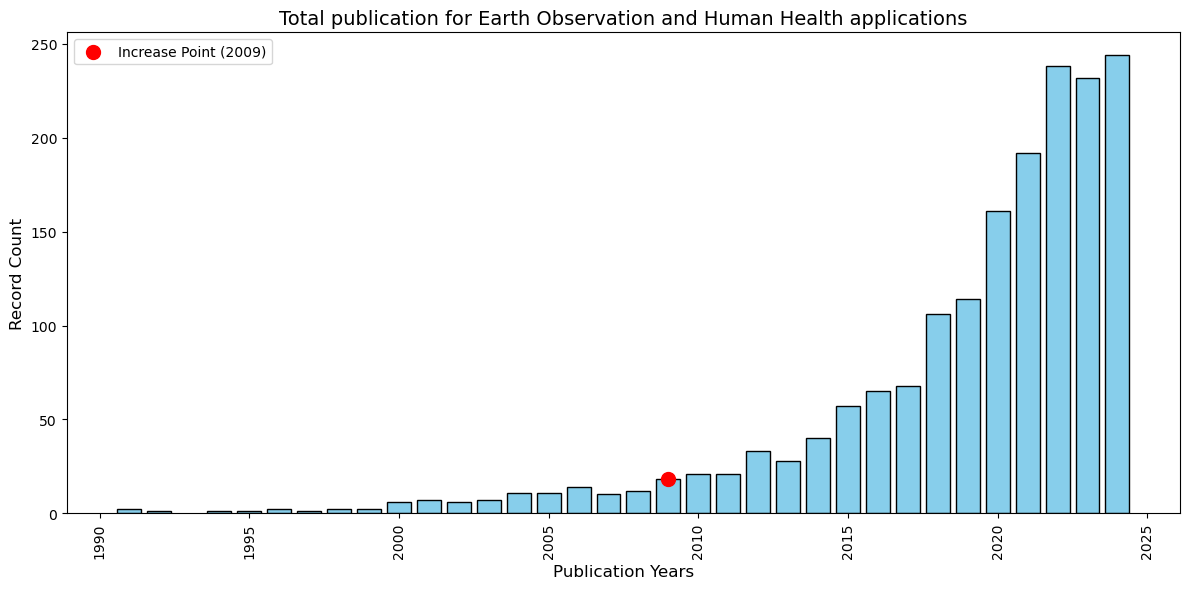

The publication count started increasing significantly in 2009 with 18 records.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##data also available here--> https://shorturl.at/pGUVu 
data = {
    "Publication Years": [
        2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 
        2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 
        2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1992, 1991
    ],
    "Record Count": [
        244, 232, 238, 192, 161, 114, 106, 68, 65, 57, 40, 28, 33, 21, 21, 18, 
        12, 10, 14, 11, 11, 7, 6, 7, 6, 2, 2, 1, 2, 1, 1, 1, 2
    ]
}


df = pd.DataFrame(data)


df = df.sort_values(by="Publication Years")


differences = np.diff(df["Record Count"])
threshold = 5  
increase_index = np.where(differences > threshold)[0][0] + 1  

increase_year = df.iloc[increase_index]["Publication Years"]
increase_count = df.iloc[increase_index]["Record Count"]


plt.figure(figsize=(12, 6))
plt.bar(df["Publication Years"], df["Record Count"], color='skyblue', edgecolor='black')


plt.scatter(increase_year, increase_count, color='red', s=100, label=f"Increase Point ({increase_year})")


plt.xlabel("Publication Years", fontsize=12)
plt.ylabel("Record Count", fontsize=12)
plt.title("Total publication for Earth Observation and Human Health applications", fontsize=14)
plt.xticks(rotation=90)
plt.legend()


plt.tight_layout()
plt.show()


print(f"The publication count started increasing significantly in {increase_year} with {increase_count} records.")


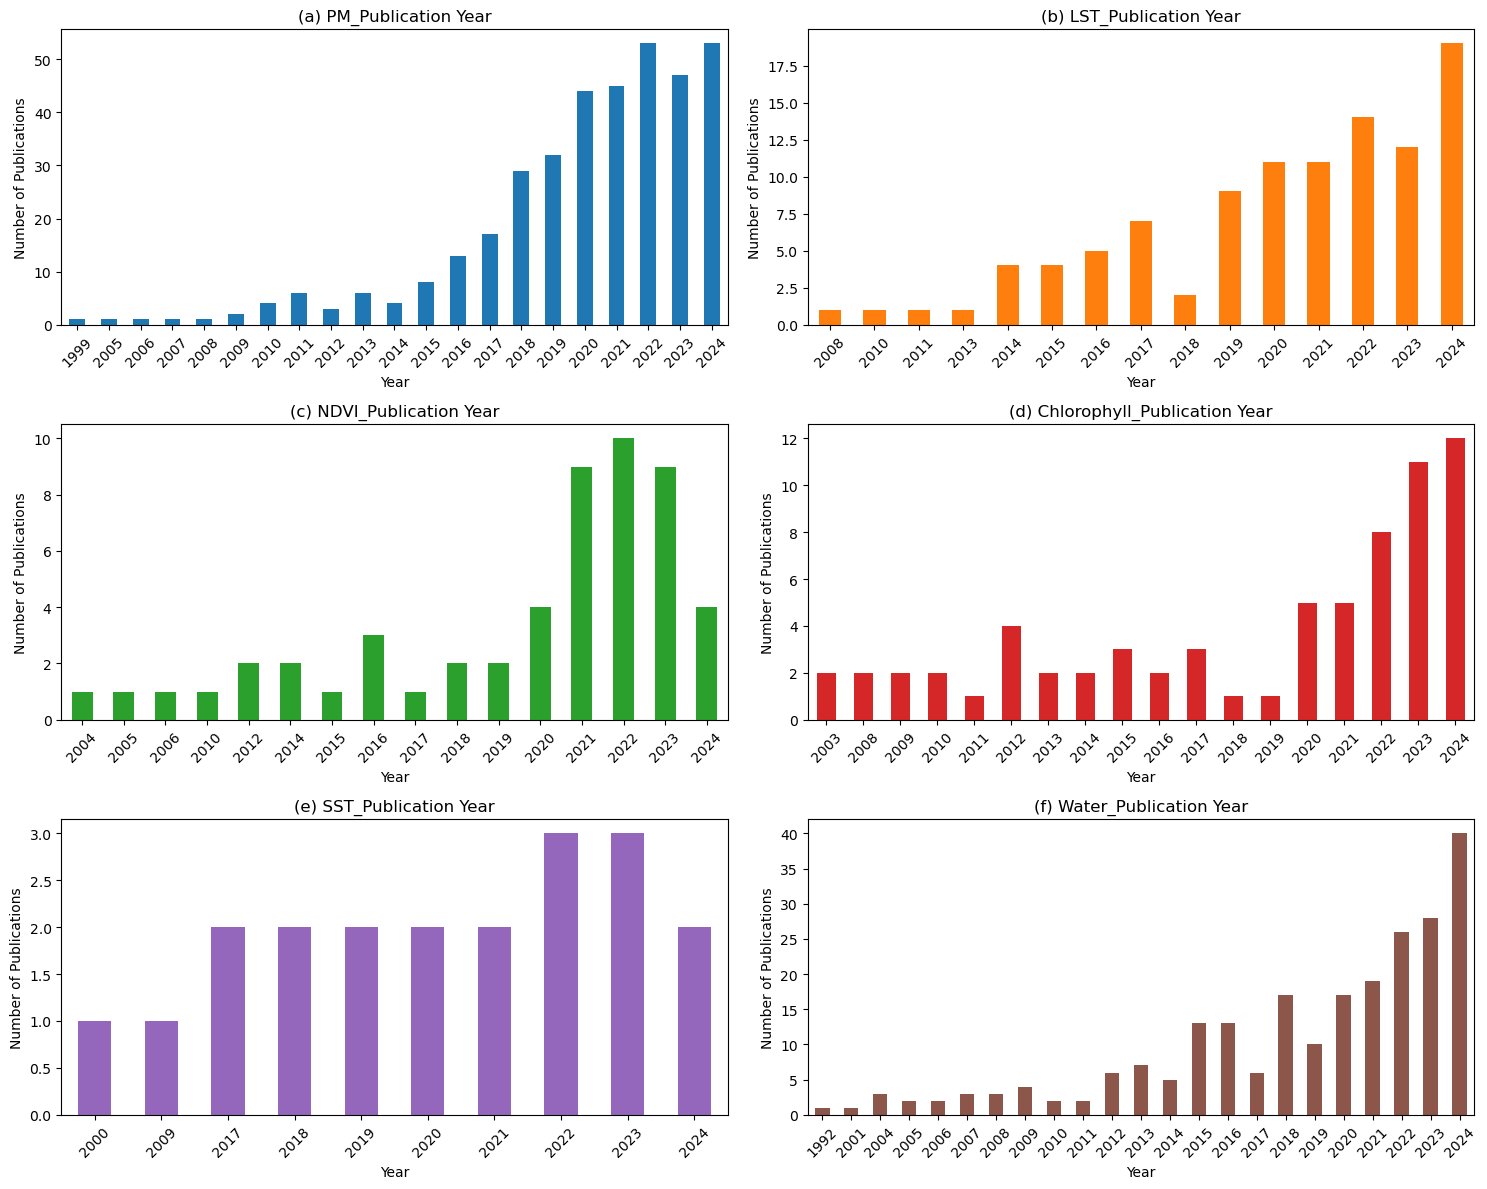

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for color palettes

##data also available here--> https://shorturl.at/pGUVu (Figure 5)

# Load the Excel file
file_path = "Figure 5_Sengupta_et_al_plot.xlsx"  
df = pd.read_excel(file_path)

columns = df.columns

# Count publications per year for each category
publication_counts = {col: df[col].value_counts().sort_index() for col in columns}

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Define a color palette
colors = sns.color_palette("tab10", len(columns))  # Use a distinct color for each subplot

# Define subplot labels
subplot_labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)"]

for i, col in enumerate(columns):
    ax = axes[i]
    pub_counts = publication_counts[col]
    
    # Convert index (years) to integers if they are floats, then to strings
    pub_counts.index = pub_counts.index.astype(int).astype(str)

    pub_counts.plot(kind='bar', ax=ax, color=colors[i])
    ax.set_title(f'{subplot_labels[i]} {col}')  # Add label before column name
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Publications')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


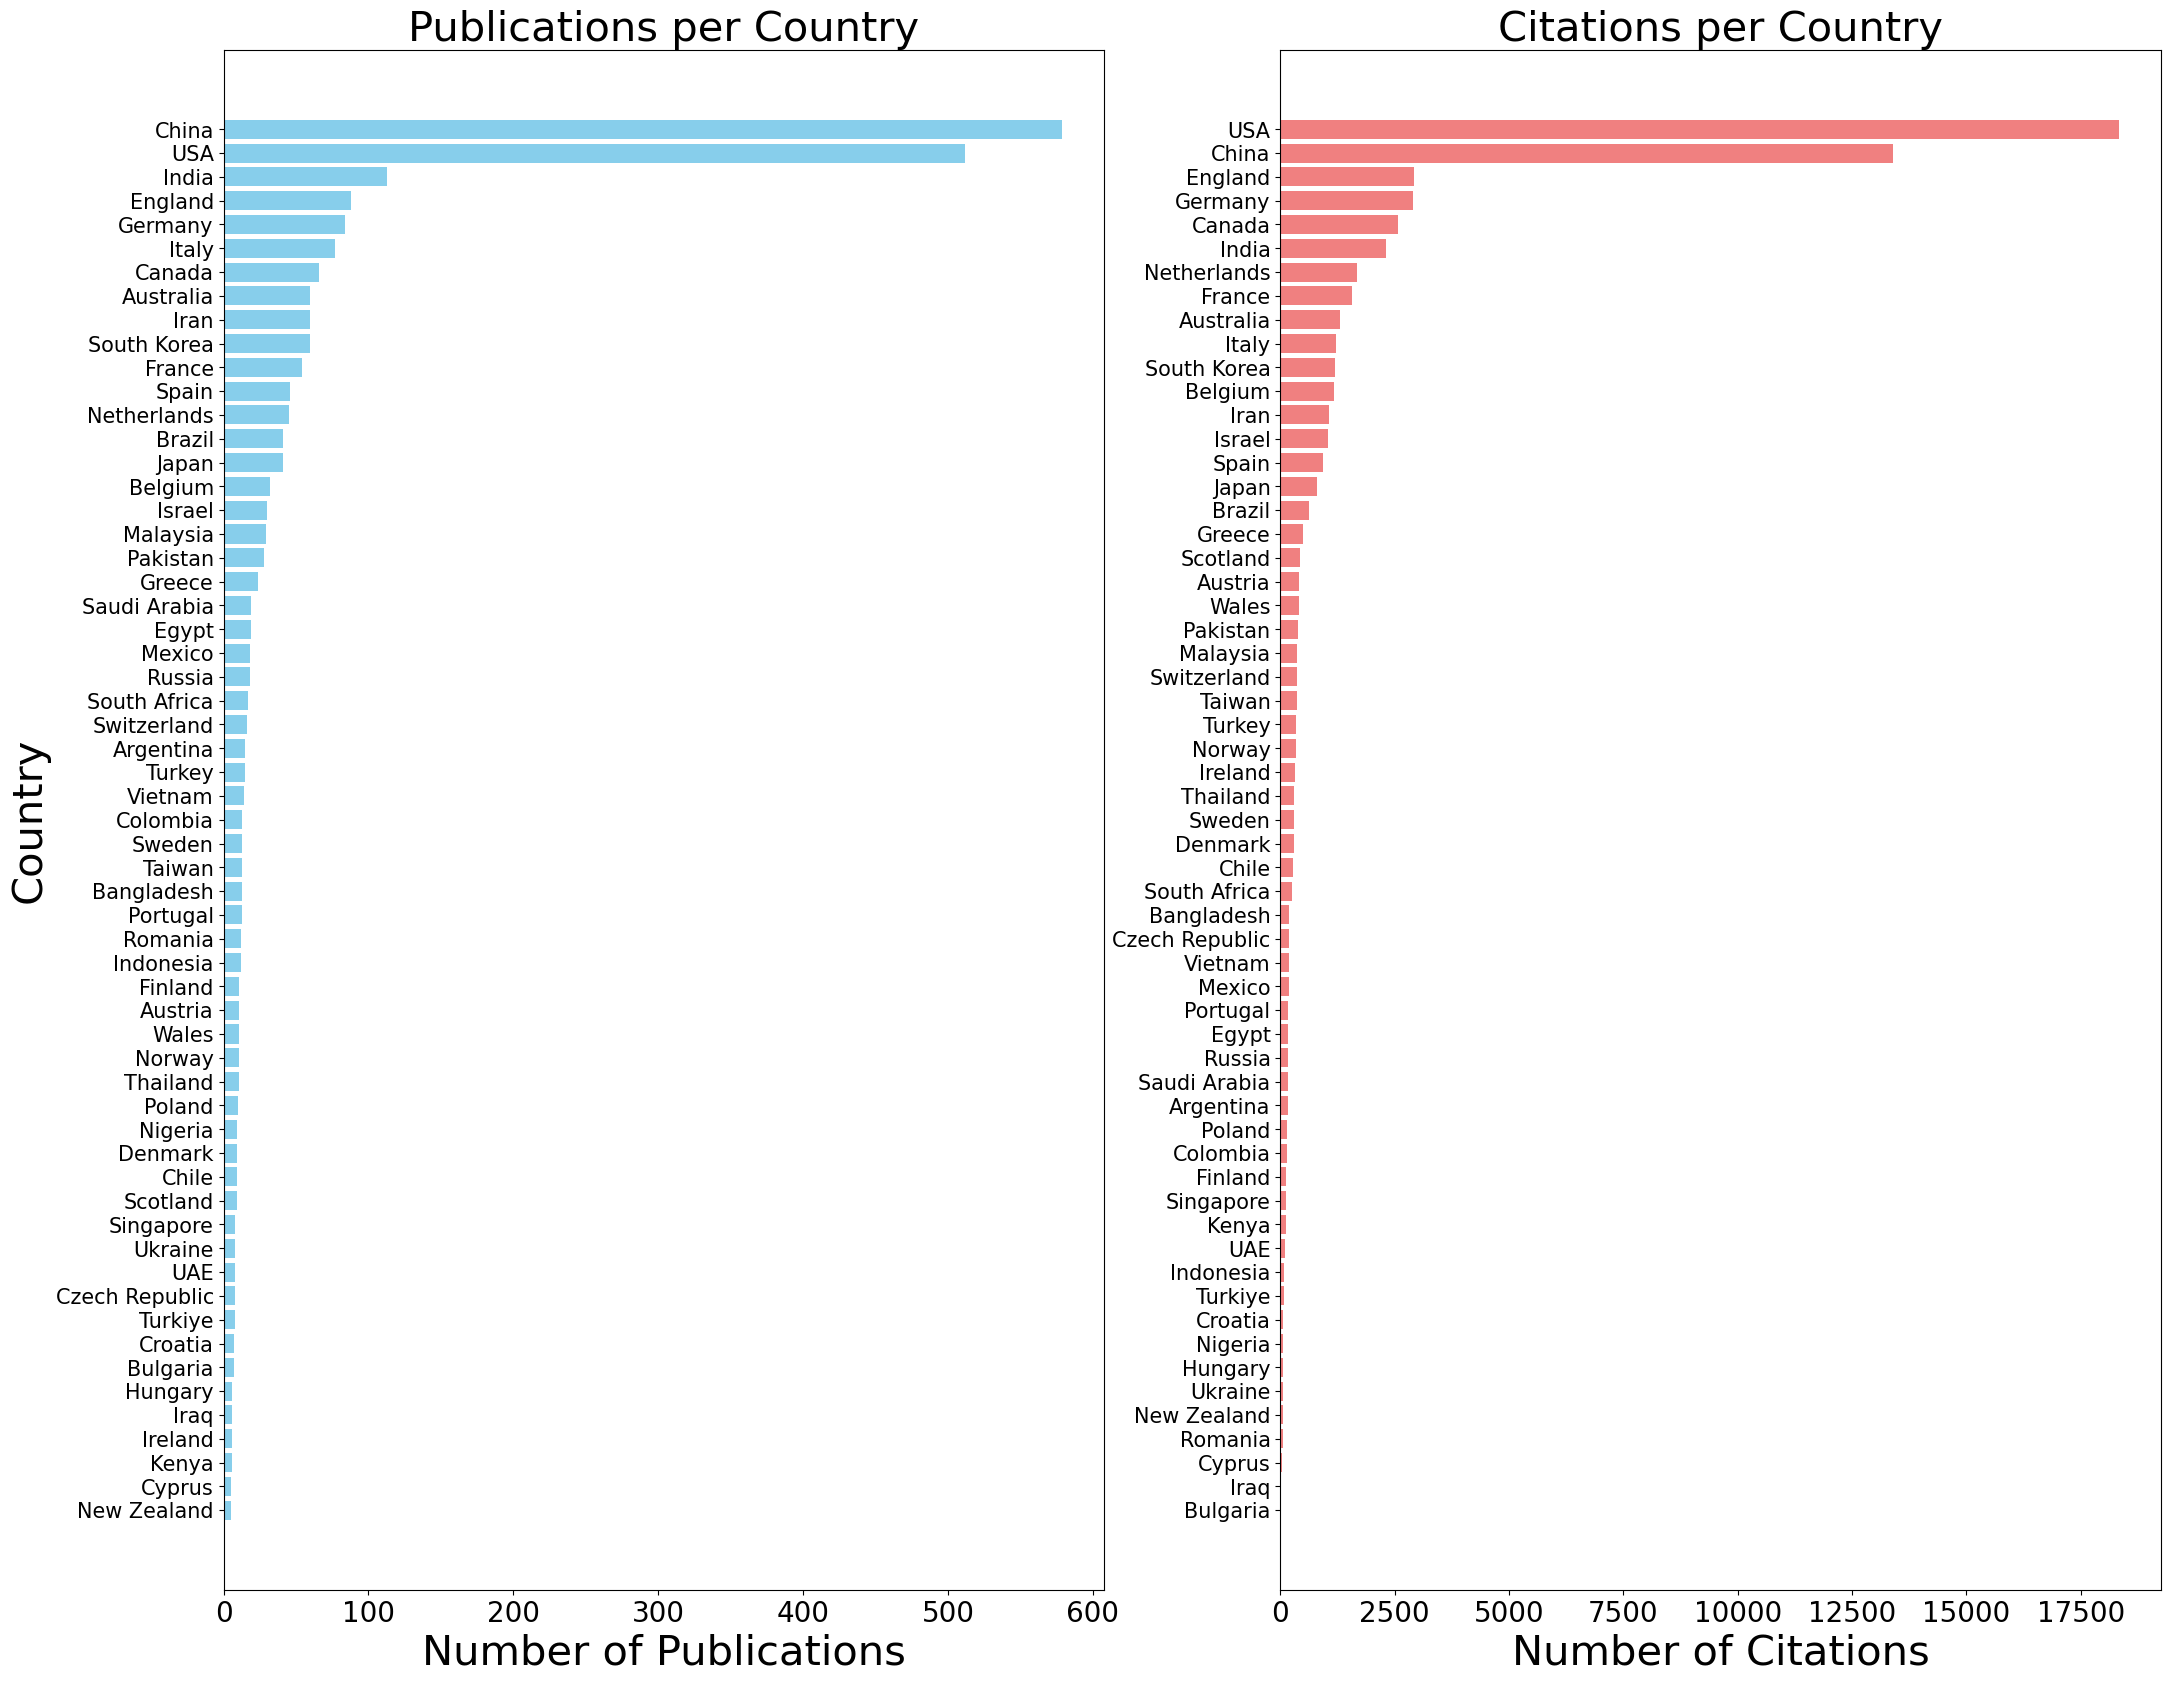

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

###data also available here--> https://shorturl.at/pGUVu 
data = {
    "Country": ["Argentina", "Australia", "Austria", "Bangladesh", "Belgium", "Brazil", "Bulgaria", "Canada", "Chile", "Colombia", "Croatia", "Cyprus", 
                "Czech Republic", "Denmark", "Egypt", "England", "Finland", "France", "Germany", "Greece", "Hungary", "India", "Indonesia", "Iran", "Iraq", 
                "Ireland", "Israel", "Italy", "Japan", "Kenya", "Malaysia", "Mexico", "Netherlands", "New Zealand", "Nigeria", "Norway", "Pakistan", "China", 
                "Poland", "Portugal", "Romania", "Russia", "Saudi Arabia", "Scotland", "Singapore", "South Africa", "South Korea", "Spain", "Sweden", 
                "Switzerland", "Taiwan", "Thailand", "Turkey", "Turkiye", "UAE", "Ukraine", "USA", "Vietnam", "Wales"],
    "Publications": [15, 60, 11, 13, 32, 41, 7, 66, 9, 13, 7, 5, 8, 9, 19, 88, 11, 54, 84, 24, 6, 113, 12, 60, 6, 6, 30, 77, 41, 6, 29, 18, 45, 5, 9, 11, 
                     28, 579, 10, 13, 12, 18, 19, 9, 8, 17, 60, 46, 13, 16, 13, 11, 15, 8, 8, 8, 512, 14, 11],
    "Citations": [157, 1300, 409, 193, 1174, 624, 9, 2566, 272, 136, 67, 34, 192, 288, 171, 2932, 122, 1564, 2904, 504, 65, 2313, 81, 1074, 16, 325, 1035, 
                  1227, 801, 117, 374, 185, 1675, 54, 67, 342, 393, 13389, 147, 178, 49, 163, 162, 425, 120, 264, 1195, 928, 289, 361, 356, 309, 343, 71, 
                  102, 62, 18338, 187, 401]
}


df = pd.DataFrame(data)


df_sorted_publications = df.sort_values(by="Publications", ascending=True)
df_sorted_citations = df.sort_values(by="Citations", ascending=True)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 20)) 

# Publications Plot
axes[0].barh(df_sorted_publications["Country"], df_sorted_publications["Publications"], color="skyblue")
axes[0].set_title("Publications per Country", fontsize=30)
axes[0].set_xlabel("Number of Publications", fontsize=30)
axes[0].set_ylabel("Country", fontsize=30)
axes[0].tick_params(axis='y', labelsize=15)  
axes[0].tick_params(axis='x', labelsize=20)  

# Citations Plot
axes[1].barh(df_sorted_citations["Country"], df_sorted_citations["Citations"], color="lightcoral")
axes[1].set_title("Citations per Country", fontsize=30)
axes[1].set_xlabel("Number of Citations", fontsize=30)
axes[1].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=20)  


plt.subplots_adjust(hspace=0.3) 
plt.show()
